# Лабораторная работа №4. Метод сеток решения волнового уравнения

## Задание 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
L = 15e-2
du = 0.1e-2
E = 86e9
rho = 8.5e3

T = 0.001
phi = lambda x: (-4 * du / L ** 2) * x ** 2 + (4 * du / L) * x
nx = 100
nt = 10000

def task1():
    dt = T / nt
    dx = L / nx
    C = np.sqrt(E / rho) * dt / dx
    if C > 1:
        print('Не выполнено условие сходимости.')
        return
    
    x_values = np.linspace(0, L, nx)
    
    A = np.zeros((nt, nx))
    A[0] = [phi(x) for x in x_values]
    A[1, 1:-1] = [phi(x_values[i]) * (1 - dt ** 2 / 2) for i in range(1, nx - 1)]

    for i in range(1, nt-1):
        A[i + 1, 1:-1] = C ** 2 * (A[i, 2:] - 2 * A[i, 1:-1] + A[i, :-2]) + 2 * A[i, 1:-1] - A[i-1, 1:-1]
    return A

In [3]:
def draw(x, y, x_label, y_label):
    plt.plot(x, y)
    plt.xlabel(x_label, size=14)
    plt.ylabel(y_label, size=14)
    return plt

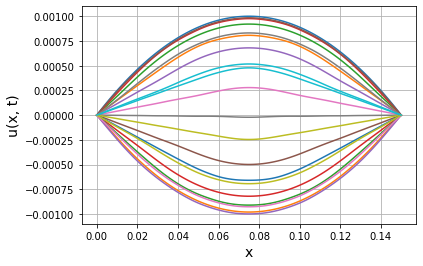

In [6]:
A = task1()

x_values = np.linspace(0, L, nx)
for i in range(0, nt, int(nt / 20)):
    draw(x_values, A[i], 'x', 'u(x, t)')
plt.grid()
plt.show()

## Задание 2

In [9]:
a = 2
b = 3
p = lambda x, y: np.tan(np.cos(np.pi * y / b))
q = lambda x, y: np.exp(np.sin(np.pi * x / a)) * np.sin(2 * np.pi * y / b)
T = 4
nx = 100
ny = 100
nt = 5000

def task_2():
    dt = T/nt
    dx = a/nx
    dy = b/ny
    
    C = dt/dx + dt/dy 
    if C > 1:
        print('Не выполнено условие сходимости.')
        return
    
    x_values = np.linspace(-a/2, a/2, nx)
    y_values = np.linspace(-b/2, b/2, ny)
    A = np.zeros((nt, nx, ny))

    for i in range(nx):
        for j in range(ny):
            A[0, i, j] = p(x_values[i], y_values[j])
            
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            A[1, i, j] = (p(x_values[i], y_values[j]) + q(x_values[i], y_values[j]) * dt
                          + dt ** 2 / (2 * dx ** 2) * (A[0, i + 1, j] - 2 * A[0, i, j] + A[0, i-1, j]) 
                          + dt ** 2 / (2 * dy ** 2) * (A[0, i, j + 1] - 2 * A[0, i, j] + A[0, i, j-1]))
            
    A[1, 1:-1, 0] = A[1, 1:-1, 1]
    A[1, 1:-1, -1] = A[1, 1:-1, -2]
    
    for t in range(1, nt - 1):
        A[t + 1, 1:-1, 1:-1] = (2 * A[t, 1:-1, 1:-1] - A[t-1, 1:-1, 1:-1] 
                        + dt ** 2 / dx ** 2 * (A[t, :-2, 1:-1]- 2 * A[t, 1:-1, 1:-1] + A[t, 2:, 1:-1])
                        + dt ** 2 / dy ** 2 * (A[t, 1:-1, :-2] - 2 * A[t, 1:-1, 1:-1] + A[t, 1:-1, 2:]))
        
        A[t + 1, 1:-1, 0] = A[t + 1, 1:-1, 1]
        A[t + 1, 1:-1, -1] = A[t + 1, 1:-1, -2]
    return A

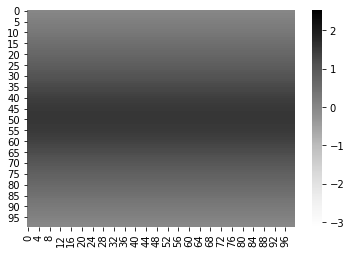

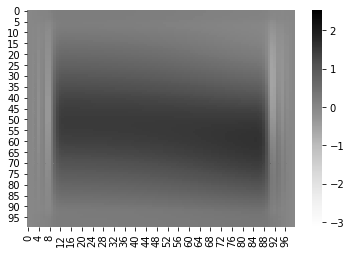

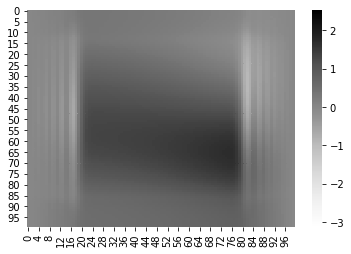

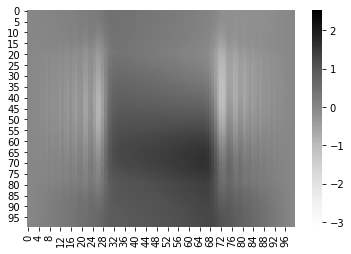

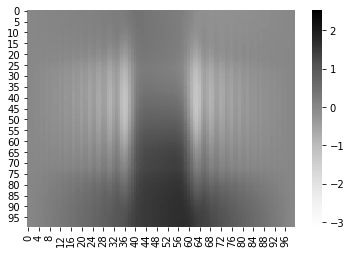

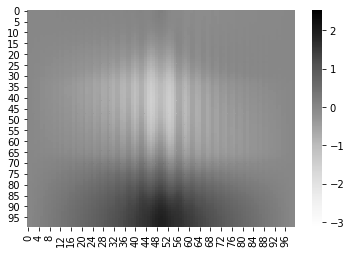

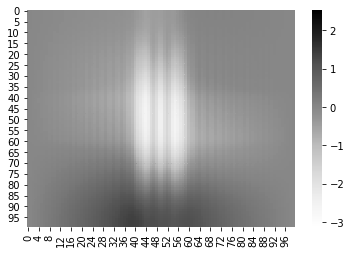

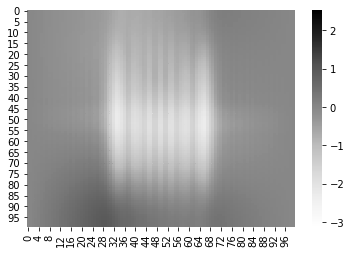

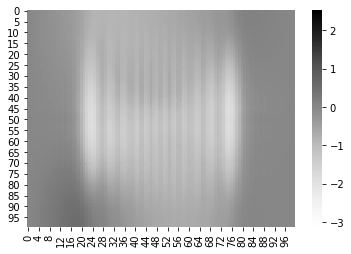

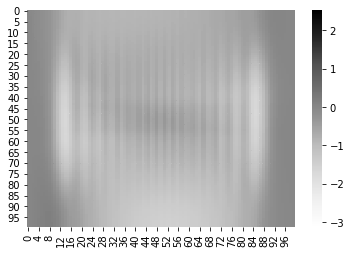

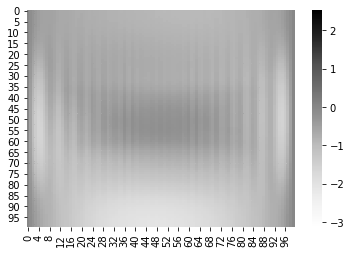

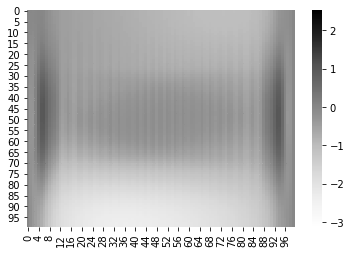

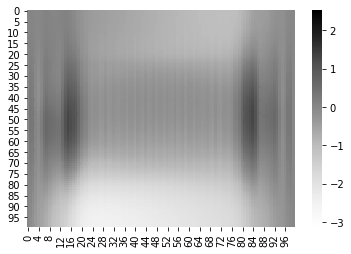

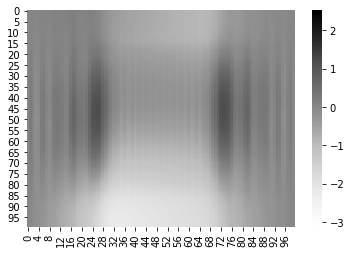

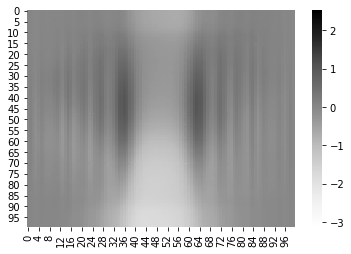

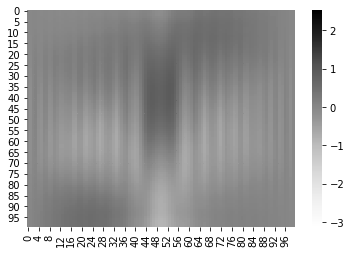

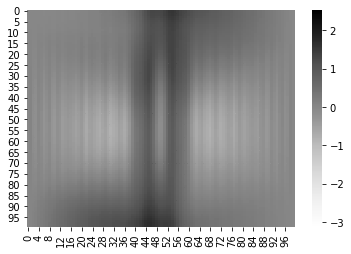

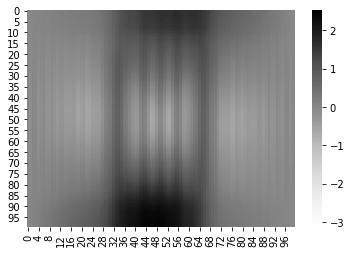

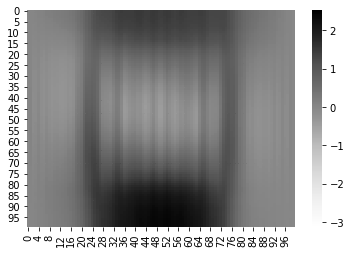

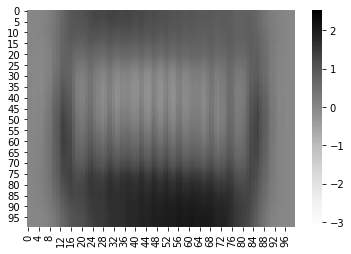

In [10]:
A = task_2()

for i in range(0, len(A), 250):
    sns.heatmap(A[i].T, cmap='Greys', vmin=A.min(), vmax=A.max())
    plt.show()